In [1]:
import pandas as pd 
import pickle

In [2]:
df = pd.read_csv("ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Data cleaning
columns_to_remove = ["batsman", "bowler", "mid", "striker", "venue", "non-striker"]
df.drop(labels= columns_to_remove, axis=1, inplace= True)

In [5]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                   'Mumbai Indians', 'Kings XI Punjab',
                   'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad',]

In [7]:
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [8]:
df = df[df['overs'] >= 5.0]

In [9]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
# converting the column 'date' from string to datetime 
from datetime import datetime
df['date'] = df['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Data-processing
processed_df = pd.get_dummies(data= df, columns= ['bat_team', 'bowl_team'])

In [24]:
processed_df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,total
32,2008-04-18,61,0,5.1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
33,2008-04-18,61,1,5.2,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
34,2008-04-18,61,1,5.3,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
35,2008-04-18,61,1,5.4,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
36,2008-04-18,61,1,5.5,58,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75885,2017-05-19,107,9,18.2,29,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75886,2017-05-19,107,9,18.3,28,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75887,2017-05-19,107,9,18.4,24,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107


In [13]:
processed_df = processed_df[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

In [14]:
X_train = processed_df.drop(labels='total', axis=1)[processed_df['date'].dt.year <= 2016]
X_test = processed_df.drop(labels='total', axis=1)[processed_df['date'].dt.year >= 2017]

In [15]:
y_train = processed_df[processed_df['date'].dt.year <= 2016]['total'].values
y_test = processed_df[processed_df['date'].dt.year >= 2017]['total'].values

In [16]:
X_train.drop(labels= 'date', axis =True, inplace= True)
X_test.drop(labels= 'date', axis =True, inplace= True)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
filename = 'LinearRegressor_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [18]:
# Ridge Regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76658e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4242e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48816e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4269e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6196e-18): result may not be accura

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   scoring='neg_mean_squared_error')

In [19]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.41527924879074


In [25]:
prediction=regressor.predict(X_test)

In [26]:
len(prediction)

2778

c:\rishav_python\virtual1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

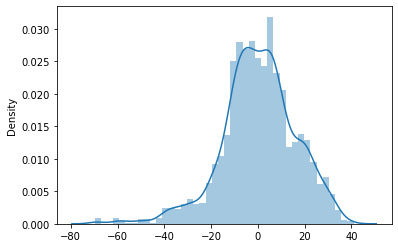

In [32]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [33]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117459616178104
MSE: 251.02870657211642
RMSE: 15.843885463235223


In [39]:
filename = 'RidgeRegressor_model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
Lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
Lasso_regressor.fit(X_train,y_train)

c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4549001.301800272, tolerance: 2529.955696594564
  model = cd_fast.enet_coordinate_descent(
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4478616.92831095, tolerance: 2547.0380710286754
  model = cd_fast.enet_coordinate_descent(
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4662065.040975613, tolerance: 2667.8126904366554
  model = cd_fast.enet_coordinate_descent(
c:\rishav_python\virtual1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [36]:
prediction2 =Lasso_regressor.predict(X_test)

In [38]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

MAE: 12.213583996827492
MSE: 262.3653827960697
RMSE: 16.197696836157593
